In [1]:
import yt
import os, sys
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
from yt.funcs import mylog
mylog.setLevel(40)
%matplotlib inline

/u/lgaertner/miniconda3/lib/python3.9/_collections_abc.py:684: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
os.chdir("/u/lgaertner/RUN_DIR/output/")
print(os.getcwd())

/ccas/u/lgaertner/RUN_DIR/output


In [3]:
class data:
    """
    Class to load HDF5 data
        To be improved
    """
    def __init__(self):
        self.rhos = []
    
    def load(self, files):
        unit_base= {"length_unit":(20.,"AU"), "time_unit":(1.0,"Myr"), "mass_unit":(1.0,"Msun")}
        for filename in files:
            ds = yt.load(filename, units_override = unit_base)
            #print(ds.field_list)
            left_edge = ds.domain_left_edge
            dims = ds.domain_dimensions
            grid = ds.covering_grid(level=0, left_edge=left_edge, dims=dims)
            rho = grid["rho"].in_units("1e-9 * g/cm**3").to_ndarray() # rho is a NumPy array
            self.rhos.append(rho)

def plot(rho, amin, amax, filename):
    path = os.path.join(os.getcwd(), 'plots/'+ filename.replace(".athdf", ".png"))
    fig = plt.figure(figsize=(10,10))
    cmap="plasma"
    ax = fig.add_subplot(111)
    #ax.contourf(rho[:,:,0].T, 100 ,cmap=cmap)
    ax.set_aspect('equal', 'box')
    pos = ax.imshow(rho[:,:,0].T, cmap=cmap, vmin=amin, vmax=amax/2, origin='lower', extent=[-10,10,-10,10])
    fig.colorbar(pos, ax=ax, label="$\Sigma$")
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    plt.savefig(path)
    plt.close()

### Investigate data format

In [4]:
f = h5py.File("cbd.out1.00065.athdf", 'r')
for key in f.attrs:
    print(key, f.attrs[key])

Coordinates b'cartesian'
DatasetNames [b'prim']
MaxLevel 0
MeshBlockSize [200 250   1]
NumCycles 15538
NumMeshBlocks 20
NumVariables [4]
RootGridSize [1000 1000    1]
RootGridX1 [-10.  10.   1.]
RootGridX2 [-10.  10.   1.]
RootGridX3 [-0.5  0.5  1. ]
Time 40.82058
VariableNames [b'rho' b'vel1' b'vel2' b'vel3']


### Athena plotting script 

In [5]:
%run ~/CODE_DIR/athena/vis/python/plot_slice.py cbd.out1.00100.athdf rho slice.png --colormap plasma
#Why does it not recognise cartesian coords?

/u/lgaertner/CODE_DIR/athena/vis/python/plot_slice.py:100: UserWarning: Coordinates not recognized; results may be misleading
  warnings.warn('Coordinates not recognized; results may be misleading')


### Import density data 

In [6]:
rhos = []
hdf5files = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".athdf")])
dat = data()
dat.load(hdf5files)
rhos = dat.rhos
#for file in hdf5files:
#    grid = load(file)
#    rho = grid["rho"].in_units("1e-9 * g/cm**3").to_ndarray() # rho is a NumPy array
#    rhos.append(rho)
rhos = np.array(rhos)
amin = np.min(rhos)
amax = np.max(rhos)

### Plots

In [7]:
for (file, rho) in zip(hdf5files,rhos):
    plot(rho, amin, amax, file)

In [8]:
plot(rhos[-1], amin, amax, "test.png")

### Video

In [9]:
images = []
os.chdir("/u/lgaertner/RUN_DIR/output/plots/")
files = np.sort([f for f in os.listdir(os.getcwd()) if f.endswith(".png")])
for f in files:
    images.append(cv2.imread(f))
height,width,layers=np.shape(images[1])
video=cv2.VideoWriter('evolution.avi',cv2.VideoWriter_fourcc(*'DIVX'), 4,(width,height), True)
for i in images:
    video.write(i)
cv2.destroyAllWindows()
video.release()
os.chdir("/u/lgaertner/RUN_DIR/output/")

### Spacetime plot

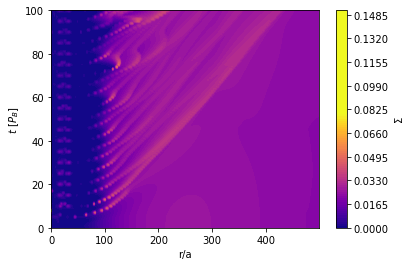

In [10]:
%matplotlib inline
spacetime = rhos[:,500:,500, 0]
cmap="plasma"
#print(np.max(spacetime))
plt.contourf(spacetime, 100 ,cmap=cmap, vmin = 0., vmax=0.08)
plt.colorbar(label="$\Sigma$")
plt.xlabel("r/a")
plt.ylabel("$t~[P_B]$")
plt.savefig('/u/lgaertner/RUN_DIR/output/plots/spacetime.png')
plt.show()

(500,)
(500,)


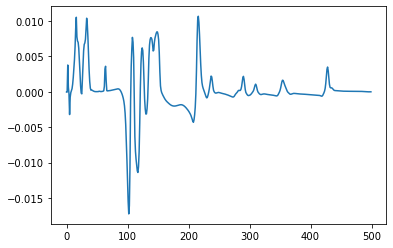

In [11]:
accretion = rhos[-1,500:,500, 0]-rhos[-2,500:,500, 0]
print(np.shape(accretion))
r = np.arange(500)
print(np.shape(r))
plt.plot(r, accretion)
plt.show()

In [12]:
print(os.getcwd())

/ccas/u/lgaertner/RUN_DIR/output
